<a href="https://colab.research.google.com/github/Mars3623/Exploratory-Data-Analysis-On-Global-Terrorism/blob/main/Global_Terrorism_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA Capstone Projects/Global Terrorism Analysis/Global Terrorism Data.csv" , 
                   encoding = "ISO-8859-1")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
drop_list = data.isna().sum().sort_values(ascending = False)/len(data)*100


In [44]:
new_data = data.drop(columns = drop_list[drop_list > 15].index)

In [86]:
new_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
eventid,197000000001,197000000002,197001000001,197001000002,197001000003,197001010002,197001020001,197001020002,197001020003,197001030001
iyear,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970
imonth,7,0,1,1,1,1,1,1,1,1
iday,2,0,0,0,0,1,2,2,2,3
extended,0,0,0,0,0,0,0,0,0,0
country,58,130,160,78,101,217,218,217,217,217
country_txt,Dominican Republic,Mexico,Philippines,Greece,Japan,United States,Uruguay,United States,United States,United States
region,2,1,5,8,4,1,3,1,1,1
region_txt,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,North America,South America,North America,North America,North America
provstate,NaN,Federal,Tarlac,Attica,Fukouka,Illinois,Montevideo,California,Wisconsin,Wisconsin


In [87]:
print(data.columns.to_list())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

*year.count  --  which years had most attacks
country count -- which countries were targetted the most
region count  -- which region was affected the most*
**of the top 10 countries which provinces and cities were affected the most**

*motive count --- major reason*

**year , property value destroyed**

*people killed the most -- year wise , counry wise*

*weapon type count  --  type of weapons used the most*

*year ransum sum --- ransum paid per year*

*target type most suseptable to attacks*

*people of which nationality were most attacked*

*success to failure ratio ---- pie chart*

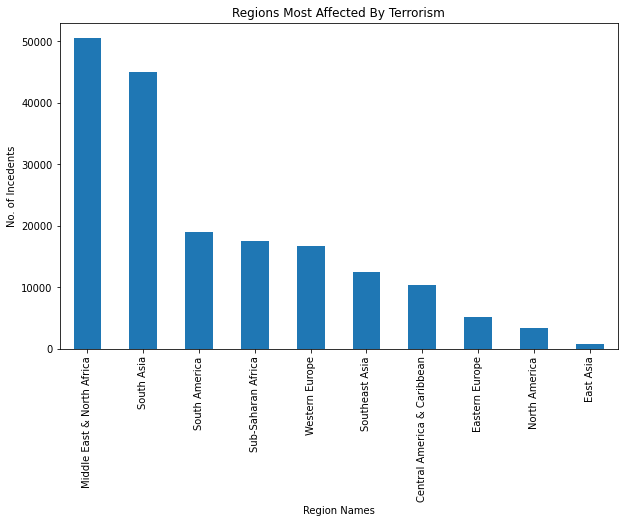

In [88]:
region = new_data.groupby(["region_txt"])["region_txt"].count().sort_values(ascending = False).head(10)

region.plot(kind = "bar" , figsize = (10 , 6) , 
            title = "Regions Most Affected By Terrorism" , 
            xlabel = "Region Names" , ylabel = "No. of Incedents")

In [89]:
new_data.groupby(["country_txt"])["country_txt"].count().sort_values(ascending = False).head(10)

country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

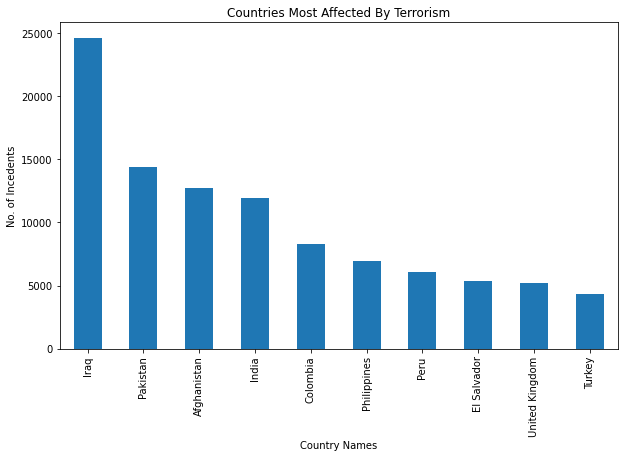

In [90]:
country_list = new_data.groupby(["country_txt"])["country_txt"].count().sort_values(ascending = False).head(10)

country_list.plot(kind = "bar" , figsize = (10 , 6) , 
                  title = "Countries Most Affected By Terrorism" , 
                  xlabel = "Country Names" , ylabel = "No. of Incedents")

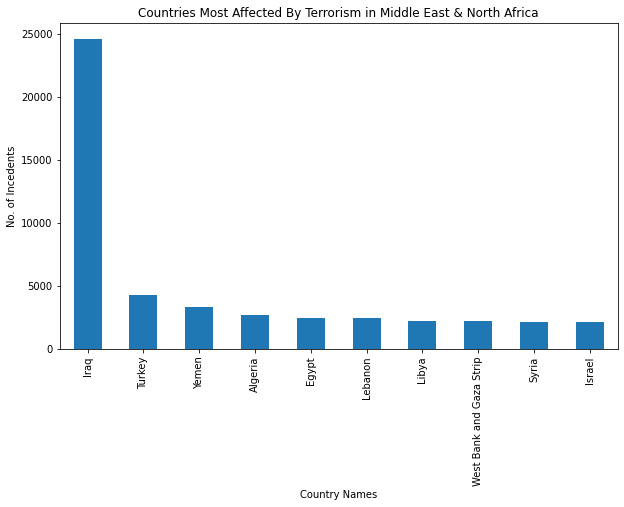

In [91]:
country_list = new_data[new_data["region_txt"] == "Middle East & North Africa"].groupby(["country_txt"])["country_txt"].count().sort_values(ascending = False).head(10)

country_list.plot(kind = "bar" , figsize = (10 , 6) , 
                  title = "Countries Most Affected By Terrorism in Middle East & North Africa" , 
                  xlabel = "Country Names" , ylabel = "No. of Incedents")

In Middle East & North Africa The Overwhelming Majority of Incedents Take Place in Iraq Alone

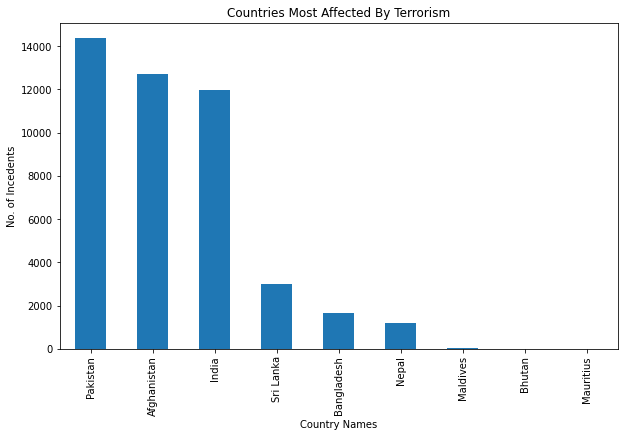

In [92]:
country_list = new_data[new_data["region_txt"] == "South Asia"].groupby(["country_txt"])["country_txt"].count().sort_values(ascending = False).head(10)

country_list.plot(kind = "bar" , figsize = (10 , 6) , 
                  title = "Countries Most Affected By Terrorism" , 
                  xlabel = "Country Names" , ylabel = "No. of Incedents")

In South Asia We see a Massive Number of Attacks In Pakistan , Afganistan and India which together contribute to the terror victims number

In [93]:
new_data[new_data["country_txt"] == "Turkey"]

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
226,197004250001,1970,4,25,0,209,Turkey,10,Middle East & North Africa,Istanbul,...,Unknown Explosive Type,0.0,0.0,1,0.0,PGIS,1,0,1,1
486,197008310001,1970,8,31,0,209,Turkey,10,Middle East & North Africa,Ankara,...,Unknown Explosive Type,0.0,0.0,1,0.0,PGIS,0,1,1,1
531,197010020002,1970,10,2,0,209,Turkey,10,Middle East & North Africa,Izmir,...,Dynamite/TNT,0.0,0.0,1,0.0,PGIS,0,1,1,1
534,197010030001,1970,10,3,0,209,Turkey,10,Middle East & North Africa,Ankara,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
535,197010030002,1970,10,3,0,209,Turkey,10,Middle East & North Africa,Ankara,...,Unknown Explosive Type,0.0,0.0,1,0.0,PGIS,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181486,201712230007,2017,12,23,0,209,Turkey,10,Middle East & North Africa,Hakkari,...,Unknown Gun Type,4.0,0.0,0,0.0,START Primary Collection,0,0,0,0
181529,201712250015,2017,12,25,0,209,Turkey,10,Middle East & North Africa,Hakkari,...,NaN,2.0,1.0,0,0.0,START Primary Collection,0,0,0,0
181607,201712280024,2017,12,28,0,209,Turkey,10,Middle East & North Africa,Adana,...,Other Explosive Type,0.0,0.0,1,0.0,START Primary Collection,-9,-9,0,-9
181610,201712280029,2017,12,28,0,209,Turkey,10,Middle East & North Africa,Hakkari,...,"Projectile (rockets, mortars, RPGs, etc.)",0.0,3.0,0,0.0,START Primary Collection,0,0,0,0


In [94]:
"""new_data[new_data["country_txt"] == "Turkey"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie")
new_data[new_data["country_txt"] == "United Kingdom"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie")
new_data[new_data["country_txt"] == "Peru"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie" , figsize = (20,15))
new_data[new_data["country_txt"] == "Philippines"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie" , figsize = (20,15))
new_data[new_data["country_txt"] == "Colombia"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie" , figsize = (20,15))
new_data[new_data["country_txt"] == "India"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie" , figsize = (20,15))
new_data[new_data["country_txt"] == "Pakistan"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie" , figsize = (20,15))
new_data[new_data["country_txt"] == "Afghanistan"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie" , figsize = (20,15))
new_data[new_data["country_txt"] == "Iraq"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie" , figsize = (20,15))"""

'new_data[new_data["country_txt"] == "Turkey"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie")\nnew_data[new_data["country_txt"] == "United Kingdom"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie")\nnew_data[new_data["country_txt"] == "Peru"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie" , figsize = (20,15))\nnew_data[new_data["country_txt"] == "Philippines"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie" , figsize = (20,15))\nnew_data[new_data["country_txt"] == "Colombia"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie" , figsize = (20,15))\nnew_data[new_data["country_txt"] == "India"].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10).plot(kind = "pie" , figsize = (20,15))\nnew_data[new_data["country_txt"] == "Pakist

Assesment of Motive behind attacks is **inconclusive** as attcks behind more than 75% of attcks is not known

In [95]:
"""new_data[new_data["country_txt"] == "Turkey"]\
[~new_data["motive"].isin(["Unknown"])]\
[~new_data["motive"].isin(["The specific motive for the attack is unknown."])]\
.groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10)"""

'new_data[new_data["country_txt"] == "Turkey"][~new_data["motive"].isin(["Unknown"])][~new_data["motive"].isin(["The specific motive for the attack is unknown."])].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10)'

In [96]:
"""new_data[new_data["country_txt"] == "India"]\
[~new_data["motive"].isin(["Unknown"])]\
[~new_data["motive"].isin(["The specific motive for the attack is unknown."])]\
[~new_data["motive"].isin(["The specific motive for the attack is unknown"])]\
[~new_data["motive"].isin(["The specific motive for the attack is unknown.."])]\
[~new_data["motive"].isin(["The specific motive for the attack is unknown or was not reported."])]\
.groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10)"""

'new_data[new_data["country_txt"] == "India"][~new_data["motive"].isin(["Unknown"])][~new_data["motive"].isin(["The specific motive for the attack is unknown."])][~new_data["motive"].isin(["The specific motive for the attack is unknown"])][~new_data["motive"].isin(["The specific motive for the attack is unknown.."])][~new_data["motive"].isin(["The specific motive for the attack is unknown or was not reported."])].groupby(["motive"])["motive"].count().sort_values(ascending = False).head(10)'

In [97]:
cities = new_data[(~new_data["city"].isin(["Unknown"]))].groupby(["city"])["city"].count().sort_values(ascending = False).head(10)

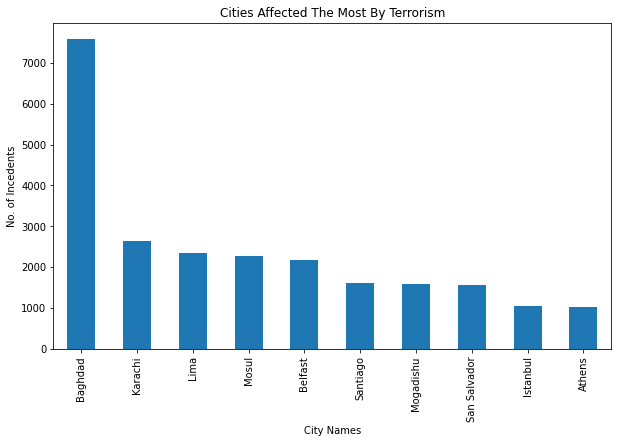

In [98]:
cities.plot(kind = "bar" , figsize = (10 , 6) , 
            title = "Cities Affected The Most By Terrorism" , 
            xlabel = "City Names" , ylabel = "No. of Incedents")

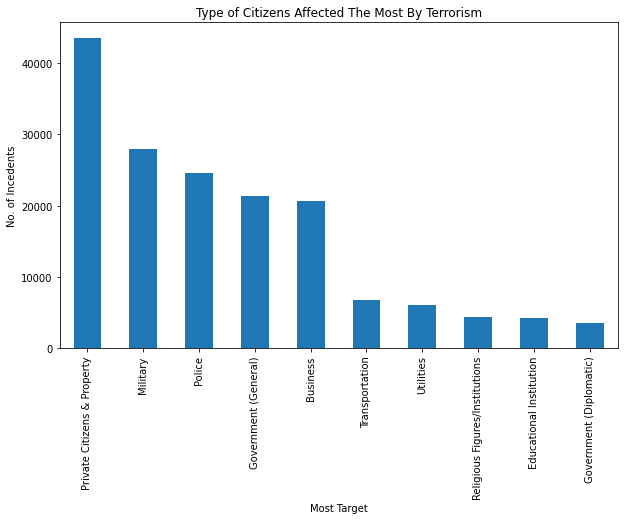

In [99]:
most_targeted = new_data[(~new_data["targtype1_txt"].isin(["Unknown"]))].groupby(["targtype1_txt"])["targtype1_txt"].count().sort_values(ascending = False).head(10)

most_targeted.plot(kind = "bar" , figsize = (10 , 6) , 
            title = "Type of Citizens Affected The Most By Terrorism" , 
            xlabel = "Most Target" , ylabel = "No. of Incedents")

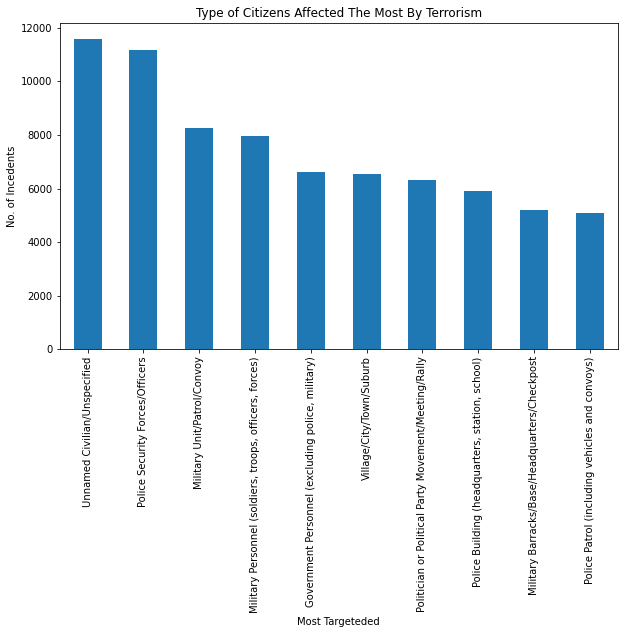

In [100]:
most_targeted2 = new_data[(~new_data["targsubtype1_txt"].isin(["Unknown"]))].groupby(["targsubtype1_txt"])["targsubtype1_txt"].count().sort_values(ascending = False).head(10)

most_targeted2.plot(kind = "bar" , figsize = (10 , 6) , 
            title = "Type of Citizens Affected The Most By Terrorism" , 
            xlabel = "Most Targeteded" , ylabel = "No. of Incedents")

**From the above two we can draw the conclusion that a large majority of private citizens were unnamed everyday citizens and most likely were a target as a collataral damage**

**On the other hand we see most of law enforsement and military are targetted followed by other goverment officals and politicians**

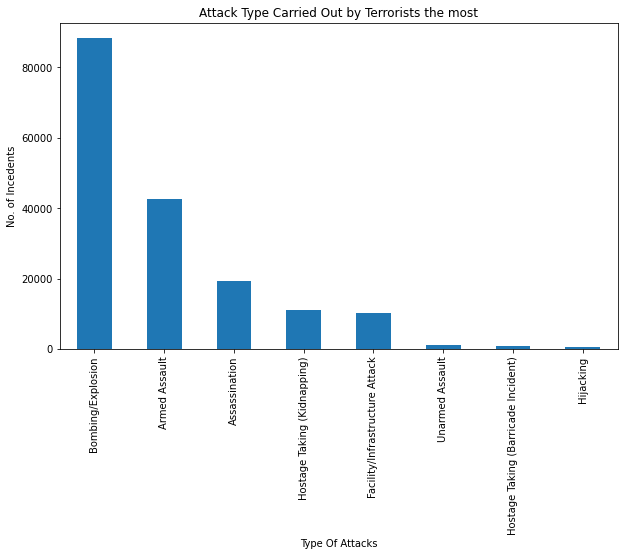

In [101]:
attack_type = new_data[(~new_data["attacktype1_txt"].isin(["Unknown"]))].groupby(["attacktype1_txt"])["attacktype1_txt"].count().sort_values(ascending = False).head(10)

attack_type.plot(kind = "bar" , figsize = (10 , 6) , 
            title = "Attack Type Carried Out by Terrorists the most" , 
            xlabel = "Type Of Attacks" , ylabel = "No. of Incedents")

We Can Conclude Bombing and Armed Assult are the most common types of attack which could lead to increase social distrust , large crowd of people dying as a concquence and substancial public or private property destroyed

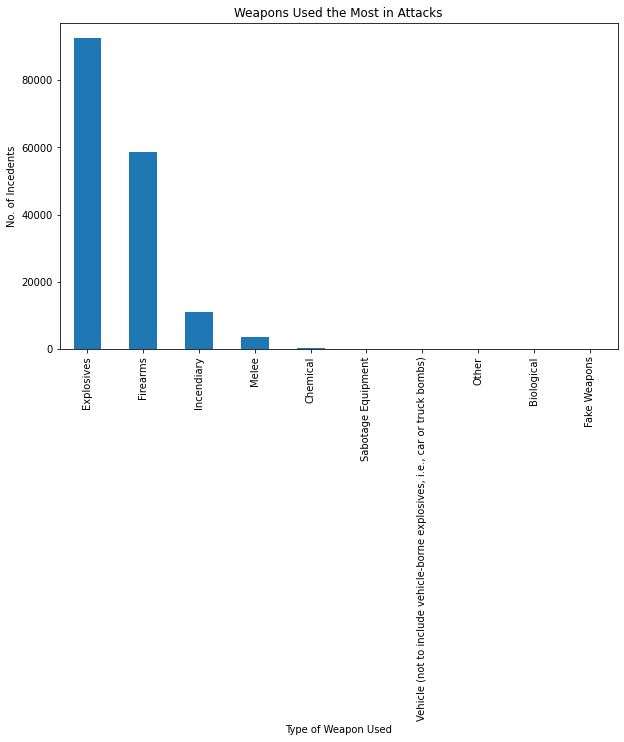

In [102]:

attack_type = new_data[(~new_data["weaptype1_txt"].isin(["Unknown"]))].groupby(["weaptype1_txt"])["weaptype1_txt"].count().sort_values(ascending = False).head(10)

attack_type.plot(kind = "bar" , figsize = (10 , 6) , 
            title = "Weapons Used the Most in Attacks" , 
            xlabel = "Type of Weapon Used" , ylabel = "No. of Incedents")

Most of the Attcks are carried out using explosives or firearms which can attack a larger group of people 

Chemical , Biological  --- More Bothersome and Dangerous

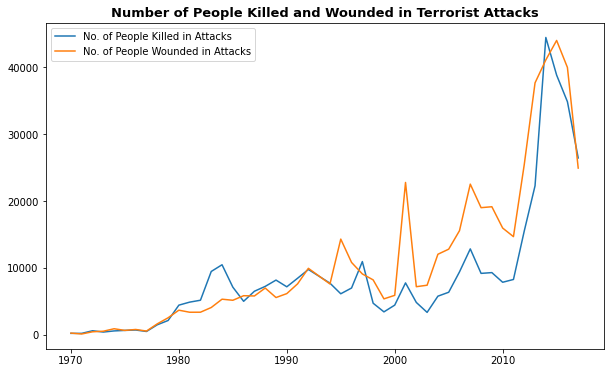

In [103]:
plt.figure(figsize = (10,6))
plt.plot(new_data[new_data["nkill"].fillna(0) != 0].groupby(["iyear"])["nkill"].sum() , label = "No. of People Killed in Attacks")
plt.plot(new_data[new_data["nwound"].fillna(0) != 0].groupby(["iyear"])["nwound"].sum() , label = "No. of People Wounded in Attacks")
plt.title("Number of People Killed and Wounded in Terrorist Attacks" , fontsize = 13 , fontweight = "bold")
plt.legend()

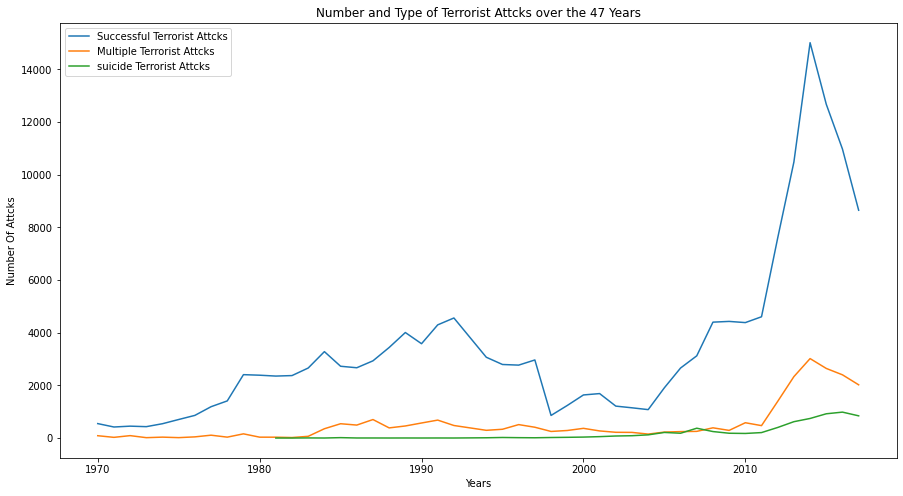

In [104]:
plt.figure(figsize = (15 , 8))
plt.plot(new_data[new_data["success"].isin([1])].groupby(["iyear"])["success"].count() , label = "Successful Terrorist Attcks")
plt.plot(new_data[new_data["multiple"].isin([1])].groupby(["iyear"])["multiple"].count() , label = "Multiple Terrorist Attcks")
plt.plot(new_data[new_data["suicide"].isin([1])].groupby(["iyear"])["suicide"].count() , label = "suicide Terrorist Attcks")
plt.xlabel("Years")
plt.ylabel("Number Of Attcks")
plt.title("Number and Type of Terrorist Attcks over the 47 Years")
plt.legend()

An extremely Sharp Increase can be seen in the number of terrorist attacks from 2005-06 till 2014 where attacks count sums up to 15015 and from that point we can see a drastic fall in 2 years to 8652 in 2017

Text(0.5, 1.0, 'Success Percentage From all incedents from 1970 to 2017')

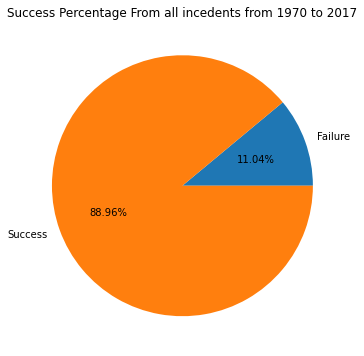

In [105]:
plt.figure(figsize = (10,6))
plt.pie(new_data.groupby(["success"])["success"].count() , labels = ["Failure" , "Success"] , autopct='%1.2f%%')
plt.title("Success Percentage From all incedents from 1970 to 2017")

Text(0.5, 1.0, 'Success Percentage From all incedents from 1970 to 2014')

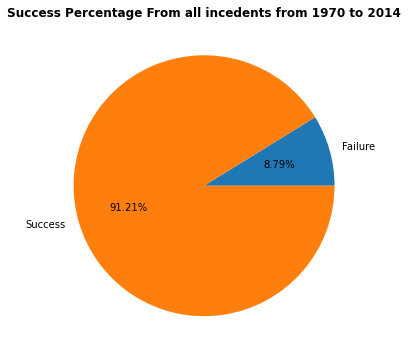

In [106]:
plt.figure(figsize = (10,6))
plt.pie(new_data[new_data["iyear"] < 2014].groupby(["success"])["success"].count() , labels = ["Failure" , "Success"] , autopct='%1.2f%%')
plt.title("Success Percentage From all incedents from 1970 to 2014" , fontsize = 12, fontweight ='bold')

Text(0.5, 1.0, 'Success Percentage From all incedents from 2014 to 2017')

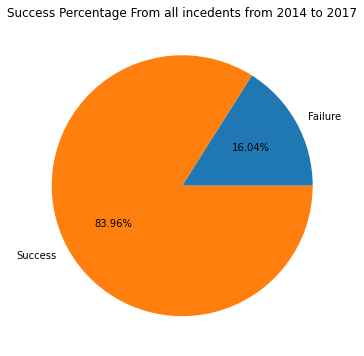

In [107]:
plt.figure(figsize = (10,6))
plt.pie(new_data[new_data["iyear"] >= 2014].groupby(["success"])["success"].count() , labels = ["Failure" , "Success"] , autopct='%1.2f%%')
plt.title("Success Percentage From all incedents from 2014 to 2017")

**The above charts suggest that the overall number of attacks have decreased yet well carried out attacks still are effective and greater need to invest in intelligence gathering and sharing and resposible use of resourses to help affected countries**

In [108]:
ransom_year = data[data["ransom"].isin([1])]

In [109]:
ransom_year.head().T

,1,27,103,112,123
eventid,197000000002,197001220001,197003030001,197003060001,197003110001
iyear,1970,1970,1970,1970,1970
imonth,0,1,3,3,3
iday,0,22,3,6,11
approxdate,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
INT_LOG,0,0,0,0,0
INT_IDEO,1,0,1,1,1
INT_MISC,1,0,0,1,1
INT_ANY,1,0,1,1,1


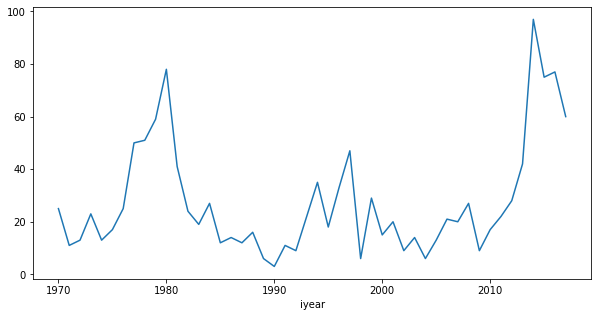

In [110]:
ransom_year.groupby(["iyear"])["ransom"].count().plot(figsize = (10,5))

Number of Ransom Related Attacks Vary Throughout the time-frame


Further Analysis = Ransom Victims Realsed or killed & Ransom Attacks Are more common in which Region

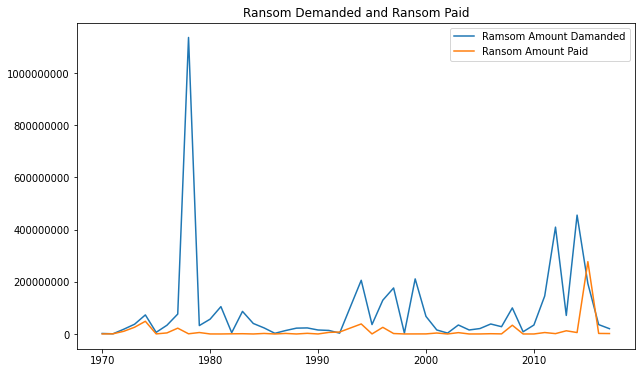

In [111]:
plt.figure(figsize = (10,6))
plt.plot(ransom_year.groupby(["iyear"])["ransomamt"].sum().astype(int) , label = "Ramsom Amount Damanded")
plt.plot(ransom_year.fillna(0).groupby(["iyear"])["ransompaid"].sum().astype(int) , label = "Ransom Amount Paid")
plt.title("Ransom Demanded and Ransom Paid")
plt.ticklabel_format(style='plain')
plt.legend()

We See A Trend That A very miniscual Amount of the Overall Demands are fullfilled but in recent years the amount has risen to the demand --- Can This be attributed to Cyber Terrorism ?

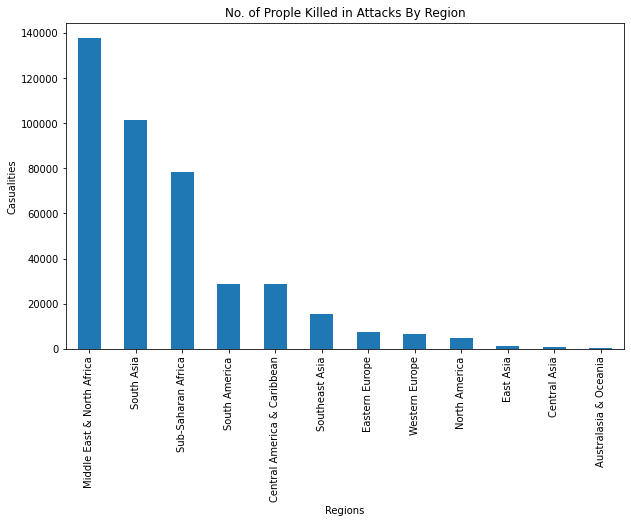

In [112]:
new_data[new_data["nkill"].fillna(0) != 0].groupby(["region_txt"])["nkill"].sum().sort_values(ascending = False).plot(kind = "bar" , 
                                                                                                                      figsize = (10,6) , 
                                                                                                                      title = "No. of Prople Killed in Attacks By Region" ,
                                                                                                                      xlabel = "Regions" , 
                                                                                                                      ylabel = "Casualities")


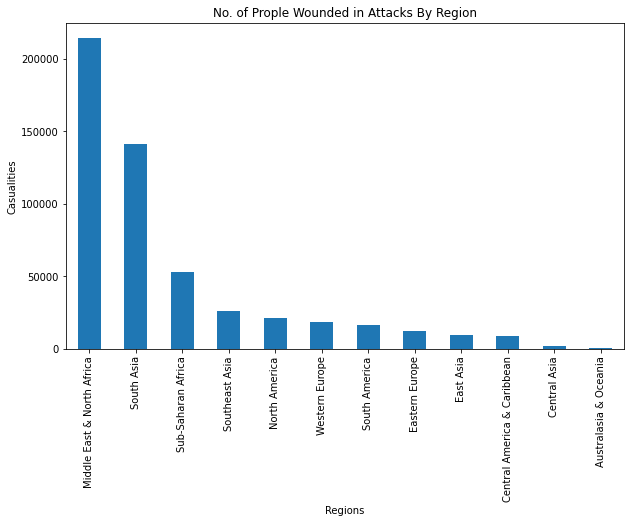

In [113]:
new_data[new_data["nwound"].fillna(0) != 0].groupby(["region_txt"])["nwound"].sum().sort_values(ascending = False).plot(kind = "bar" , 
                                                                                                                      figsize = (10,6) , 
                                                                                                                      title = "No. of Prople Wounded in Attacks By Region" ,
                                                                                                                      xlabel = "Regions" , 
                                                                                                                      ylabel = "Casualities")

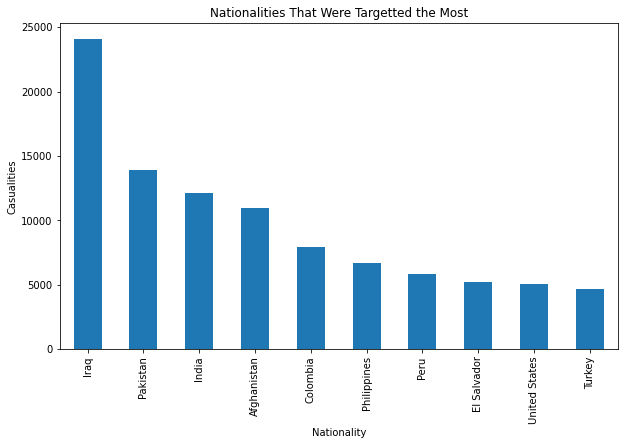

In [114]:
new_data.groupby("natlty1_txt")["natlty1_txt"].count().sort_values(ascending = False).head(10).plot(kind = "bar" , 
                                                                                                    figsize = (10 , 6) , 
                                                                                                    title = "Nationalities That Were Targetted the Most" , 
                                                                                                    xlabel = "Nationality" , ylabel = "Casualities")